## LOVEの分類

データの前処置

In [16]:
import torch

X = torch.tensor(
    [
     [
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1]
     ],
     [
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 1, 1, 1, 1]      
     ],
     [
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [0, 1, 1, 1, 0],
      [0, 0, 1, 0, 0]      
     ],
     [
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1]      
     ]
    ], dtype = torch.float
)

In [17]:
y = torch.tensor([0, 1, 2, 3])

In [18]:
classes = {
    0: "L",
    1: "O",
    2: "V",
    3: "E" 
    }

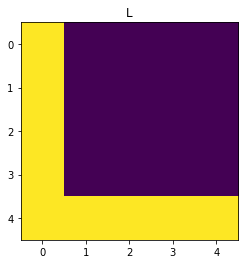

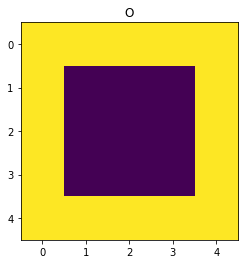

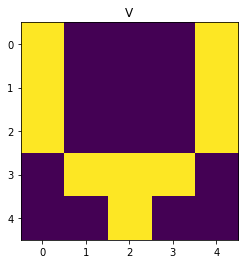

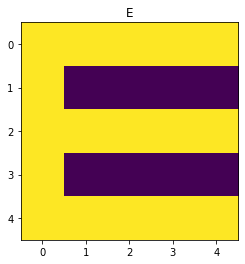

In [19]:
import matplotlib.pyplot as plt

for i in range(4):
  plt.imshow(X[i])
  plt.title(classes[y[i].item()])
  plt.show()

モデルの構築

In [46]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    """
    引数1 in channel
    引数2 out channnel
    引数3 kernel_size
    引数4 stride
    引数5 padding
    """
    self.conv1 = nn.Conv2d(1, 6, 2, 1, 1)
    self.conv2 = nn.Conv2d(6, 6, 2, 1, 1)
    self.conv3 = nn.Conv2d(6, 1, 2, 1, 1)
    self._to_linear = None
    x = torch.rand(5, 5).view(-1, 1, 5, 5)
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear, 16)
    self.fc2 = nn.Linear(16, 16)
    self.fc3 = nn.Linear(16, 4)

  def convs(self, x):
    x = F.max_pool2d(self.conv1(x), (2, 2))
    x = F.max_pool2d(self.conv2(x), (2, 2))
    x = F.max_pool2d(self.conv3(x), (2, 2)) 
    if self._to_linear is None:
      self._to_linear = x[0].shape[0] * x[0].shape[2]
    return x
  
  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.dropout(x, p = 0.1)
    x = F.relu(self.fc3(x))
    return x

In [47]:
net = CNN()

In [48]:
net.forward((X[0].view(-1, 1, 5, 5)))

tensor([[0.1465, 0.1316, 0.1017, 0.0000]], grad_fn=<ReluBackward0>)

In [49]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.005)
epochs = 200

モデルの訓練

In [50]:
losses = []
for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = net(X.view(-1, 1, 5, 5))
  loss = loss_fn(outputs, y)
  loss.backward()
  optimizer.step()
  losses.append(loss)

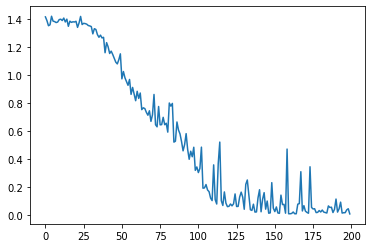

In [51]:
plt.plot(losses)

モデルの評価

In [71]:
def accuracy(X, y):
  """
  入力データと正解ラベルを与えると、正解率を返却する関数
  Args:
   X(tensor):入力データ
   y(tensor):入力データ

  Returns
   accuracy(float):正解率
  """
  return (net(X.view(-1, 1, 5, 5)).max(dim = 1)[1] == y).sum().item() /len(y)

In [72]:
net.eval() #ネットワークの固定
print("正解率：{}".format(accuracy(X, y)))

正解率：1.0


In [83]:
X_test = torch.tensor(
    [
     [
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 1],
      [1, 1, 1, 1, 1]
     ],
     [
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 1, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 1, 1, 1, 1]      
     ],
     [
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0],
      [0, 0, 1, 0, 0]      
     ],
     [
      [1, 1, 1, 1, 0],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1]      
     ]
    ], dtype = torch.float
)

正解率：0.75


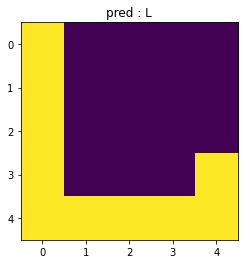

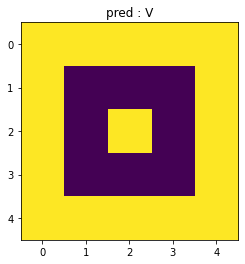

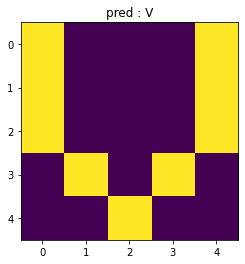

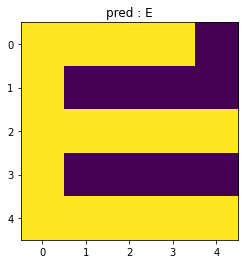

In [93]:
net.eval() #ネットワークの固定
print("正解率：{}".format(accuracy(X_test, y)))
for i in range(4):
  pred = classes[net(X_test[i].view(-1, 1, 5, 5)).max(dim = 1)[1].item()]
  plt.imshow(X_test[i])
  plt.title("pred : {}".format(pred))
  plt.show()

推論

In [99]:
x = torch.tensor(
    [
     [1., 0., 0., 0., 1.],
     [1., 0., 0., 0., 1.],
     [1., 0., 0., 0., 1.],
     [0., 1., 1., 1., 0.],
     [0., 1., 1., 0., 0.]], dtype = torch.float
)
t = torch.tensor([2])

In [100]:
def predict(x):
  net.eval()
  return classes[net(x.view(-1, 1, 5, 5)).max(dim = 1)[1].item()]
predict(x)

'V'

## Fashion MNIST

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

データの前処理

In [2]:
from torchvision.datasets import FashionMNIST

In [3]:
from torch.utils.data import DataLoader

In [4]:
from torchvision import transforms 

In [5]:
fashion_mnist_train = FashionMNIST("FashionMNIST",
                                  train = True, 
                                  download = True, 
                                  transform = transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
fashion_mnist_test = FashionMNIST("FashionMNIST",
                                  train = False, 
                                  download = True, 
                                  transform = transforms.ToTensor())

In [7]:
batch_size = 128

train_loader = DataLoader(fashion_mnist_train, 
                          batch_size = batch_size,
                          shuffle = True)
test_loader = DataLoader(fashion_mnist_test, 
                          batch_size = batch_size,
                          shuffle = True)

In [8]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

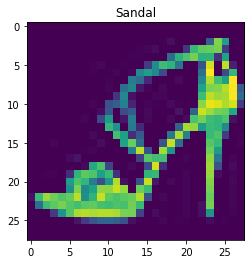

In [9]:
images, labels = iter(train_loader).next()
plt.imshow(images[0].squeeze(0))
plt.title(classes[labels[0].item()])
plt.show()

モデルの構築

In [10]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layers = nn.Sequential(
        nn.Conv2d(1, 16, 5, 1, 0),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, 5, 1, 0),
        nn.Conv2d(32, 64, 5, 1 ,0),
        nn.MaxPool2d(2, 2)
    )
    self.dense = nn.Sequential(
        nn.Linear(256, 128),
        nn.Dropout(p = 0.2),
        nn.Linear(128, 128),
        nn.Dropout(p = 0.2),
        nn.Linear(128, 10)   
    )
    
  def forward(self, x):
    out = self.conv_layers(x)
    out = out.view(out.size(0), -1)
    out = self.dense(out)
    return out

In [11]:
net = CNN()

In [12]:
net.forward(images[0].unsqueeze(0))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[ 0.0281,  0.1219, -0.0350, -0.1160,  0.0492,  0.0317, -0.0681,  0.1412,
         -0.0107, -0.0597]], grad_fn=<AddmmBackward>)

モデルの訓練

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [14]:
net = CNN().to(device)

In [15]:
images = images.to(device)
labels = labels.to(device)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
epochs = 20

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

import time
start = time.time()

for epoch in range(epochs):
  #訓練用
  net.train()

  train_loss = 0
  train_acc = 0
  for i, (images, labels) in enumerate(train_loader):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = net(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    train_acc += (outputs.max(dim = 1)[1] == labels).sum().item()
  avg_train_loss = train_loss / len(train_loader.dataset)
  avg_train_acc = train_acc / len(train_loader.dataset)

  #テスト用
  net.eval()

  val_loss = 0
  val_acc = 0
  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = net(images)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      val_acc += (outputs.max(dim = 1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

  end = time.time() - start
  print(f"Epoch[{epoch+1}/{epochs}]") 
  print(f"TrainLoss:{avg_train_loss:.4f}/ValLoss{avg_val_loss:.4f}")
  print(f"TrainAccuracy:{avg_train_acc:.4f}/ValAccuracy{avg_val_acc:.4f}")
  print("{} sec".format(end))

Epoch[1/20]
TrainLoss:0.0031/ValLoss0.0028
TrainAccuracy:0.8565/ValAccuracy0.8745
14.11944031715393 sec
Epoch[2/20]
TrainLoss:0.0026/ValLoss0.0028
TrainAccuracy:0.8788/ValAccuracy0.8780
28.542469263076782 sec
Epoch[3/20]
TrainLoss:0.0024/ValLoss0.0025
TrainAccuracy:0.8912/ValAccuracy0.8878
42.667059898376465 sec
Epoch[4/20]
TrainLoss:0.0022/ValLoss0.0025
TrainAccuracy:0.8979/ValAccuracy0.8879
56.789931297302246 sec
Epoch[5/20]
TrainLoss:0.0020/ValLoss0.0024
TrainAccuracy:0.9064/ValAccuracy0.8901
71.09697771072388 sec
Epoch[6/20]
TrainLoss:0.0019/ValLoss0.0025
TrainAccuracy:0.9115/ValAccuracy0.8865
85.32049870491028 sec
Epoch[7/20]
TrainLoss:0.0018/ValLoss0.0023
TrainAccuracy:0.9166/ValAccuracy0.8959
99.42938685417175 sec
Epoch[8/20]
TrainLoss:0.0017/ValLoss0.0024
TrainAccuracy:0.9208/ValAccuracy0.8980
113.70872974395752 sec
Epoch[9/20]
TrainLoss:0.0016/ValLoss0.0024
TrainAccuracy:0.9261/ValAccuracy0.8936
127.86653852462769 sec
Epoch[10/20]
TrainLoss:0.0015/ValLoss0.0025
TrainAccuracy:0

モデルの評価

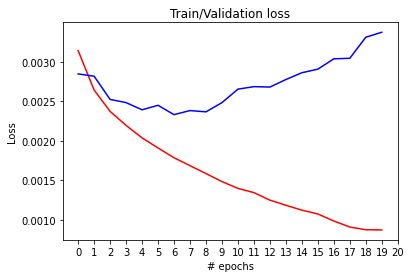

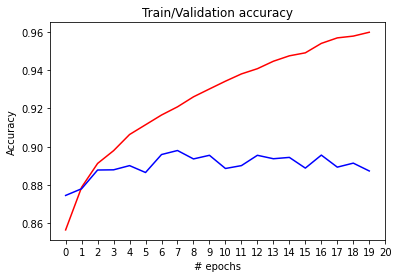

In [23]:
plt.plot(train_loss_list, color = "red")
plt.plot(val_loss_list, color = "blue")
plt.xlabel("# epochs")
plt.ylabel("Loss")
plt.title("Train/Validation loss")
plt.xticks(torch.arange(0, 21, 1))
plt.show()

plt.plot(train_acc_list, color = "red")
plt.plot(val_acc_list, color = "blue")
plt.xlabel("# epochs")
plt.ylabel("Accuracy")
plt.title("Train/Validation accuracy")
plt.xticks(torch.arange(0, 21, 1))
plt.show()

推論

Answer:Ankle boot


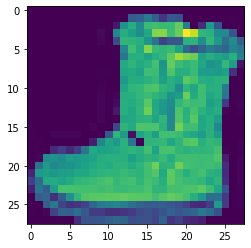

In [30]:
images, labels = iter(test_loader).next()
print("Answer:{}".format(classes[labels[0]]))
plt.imshow(images[0].squeeze())

In [32]:
image = images[0].to(device)
print("予測：{}".format(classes[net(image.view(1, 1, 28, 28)).max(dim = 1)[1].item()]))

予測：Ankle boot
